# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [100]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [101]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [103]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A1.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A17.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A23.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A48.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.3~A39.K_9L.png'],
  '1': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A30.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A1.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9L.png'

In [104]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A30.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.4~A36.K_9L.png'],
  '1': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A17.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A23.K_9L.png'],
  '2': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A1.K_9L.png'],
  '3': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A48.K_9L.png'],
  '4': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9L.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.3~A39.K_9L.png']},
 'chr_9_inversion': {'0': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_9_inversion\\78034.12~A30.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_9_inversion\\78034.4~A36.K_9R.png'],
  '1': ['F:

In [105]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A30.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A1.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A17.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A23.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A48.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.3~A39.K_9L.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.4~A36.K_9L.png'],
 'chr_9_inversion': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_9_inversion\\78034.12~A15.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_9_inversion\\78034.12~A21.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_9_inversion

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [109]:
type(X_train_name)

dict

In [110]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [111]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_09
   Train: 
        78034.12~A15.K_9L.png
        78034.12~A21.K_9L.png
        78034.13~A1.K_9L.png
        78034.13~A17.K_9L.png
        78034.13~A6.K_9L.png
        78034.2~A23.K_9L.png
        78034.2~A48.K_9L.png
        78034.3~A39.K_9L.png
   Test: 
        78034.12~A30.K_9L.png
        78034.4~A36.K_9L.png
chr_9_inversion
   Train: 
        78034.12~A15.K_9R.png
        78034.12~A21.K_9R.png
        78034.13~A1.K_9R.png
        78034.13~A17.K_9R.png
        78034.13~A6.K_9R.png
        78034.2~A23.K_9R.png
        78034.2~A48.K_9R.png
        78034.3~A39.K_9R.png
   Test: 
        78034.12~A30.K_9R.png
        78034.4~A36.K_9R.png


### 3.1.1. Helper Functions

In [113]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [114]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [117]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [120]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [121]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [124]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [126]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [127]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [129]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [130]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [131]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [133]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [134]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [135]:
y_test

array([0, 0, 1, 1])

In [136]:
len(X_train)

16

In [137]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [140]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [142]:
model = Sequential()

In [143]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [144]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [146]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 3.2.5. Compile the modal

In [148]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [150]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/100
1/1 [==============================] - 34s 34s/step - loss: 14.9130 - accuracy: 0.5000 - val_loss: 3154.4265 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 33s 33s/step - loss: 3156.2329 - accuracy: 0.5000 - val_loss: 291.5497 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 22s 22s/step - loss: 291.0760 - accuracy: 0.5000 - val_loss: 549.9239 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 25s 25s/step - loss: 550.3615 - accuracy: 0.5000 - val_loss: 224.7061 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 31s 31s/step - loss: 224.8905 - accuracy: 0.5000 - val_loss: 5.1188 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 51s 51s/step - loss: 5.2865 - accuracy: 0.5000 - val_loss: 29.1162 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 48s 48s/step - loss: 28.9755 - accuracy: 0.5000 - val_loss: 10.1078 - val_accuracy: 0.500

Epoch 338/500
6/6 [==============================] - 1s 115ms/step - loss: 2.2567e-07 - accuracy: 1.0000 - val_loss: 1.3492 - val_accuracy: 0.9425
Epoch 339/500
6/6 [==============================] - 1s 114ms/step - loss: 2.2429e-07 - accuracy: 1.0000 - val_loss: 1.3498 - val_accuracy: 0.9425
Epoch 340/500
6/6 [==============================] - 1s 111ms/step - loss: 2.2188e-07 - accuracy: 1.0000 - val_loss: 1.3506 - val_accuracy: 0.9425
Epoch 341/500
6/6 [==============================] - 1s 111ms/step - loss: 2.2119e-07 - accuracy: 1.0000 - val_loss: 1.3513 - val_accuracy: 0.9425
Epoch 342/500
6/6 [==============================] - 1s 111ms/step - loss: 2.1912e-07 - accuracy: 1.0000 - val_loss: 1.3520 - val_accuracy: 0.9425
Epoch 343/500
6/6 [==============================] - 1s 117ms/step - loss: 2.1809e-07 - accuracy: 1.0000 - val_loss: 1.3526 - val_accuracy: 0.9425
Epoch 344/500
6/6 [==============================] - 1s 114ms/step - loss: 2.1671e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 394/500
6/6 [==============================] - 1s 113ms/step - loss: 1.4884e-07 - accuracy: 1.0000 - val_loss: 1.3885 - val_accuracy: 0.9425
Epoch 395/500
6/6 [==============================] - 1s 114ms/step - loss: 1.4815e-07 - accuracy: 1.0000 - val_loss: 1.3892 - val_accuracy: 0.9425
Epoch 396/500
6/6 [==============================] - 1s 146ms/step - loss: 1.4677e-07 - accuracy: 1.0000 - val_loss: 1.3900 - val_accuracy: 0.9425
Epoch 397/500
6/6 [==============================] - 1s 113ms/step - loss: 1.4574e-07 - accuracy: 1.0000 - val_loss: 1.3907 - val_accuracy: 0.9425
Epoch 398/500
6/6 [==============================] - 1s 117ms/step - loss: 1.4470e-07 - accuracy: 1.0000 - val_loss: 1.3913 - val_accuracy: 0.9425
Epoch 399/500
6/6 [==============================] - 1s 113ms/step - loss: 1.4367e-07 - accuracy: 1.0000 - val_loss: 1.3920 - val_accuracy: 0.9425
Epoch 400/500
6/6 [==============================] - 1s 113ms/step - loss: 1.4298e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 450/500
6/6 [==============================] - 1s 113ms/step - loss: 1.0302e-07 - accuracy: 1.0000 - val_loss: 1.4242 - val_accuracy: 0.9425
Epoch 451/500
6/6 [==============================] - 1s 117ms/step - loss: 1.0233e-07 - accuracy: 1.0000 - val_loss: 1.4248 - val_accuracy: 0.9425
Epoch 452/500
6/6 [==============================] - 1s 112ms/step - loss: 1.0233e-07 - accuracy: 1.0000 - val_loss: 1.4254 - val_accuracy: 0.9425
Epoch 453/500
6/6 [==============================] - 1s 112ms/step - loss: 1.0129e-07 - accuracy: 1.0000 - val_loss: 1.4259 - val_accuracy: 0.9425
Epoch 454/500
6/6 [==============================] - 1s 113ms/step - loss: 1.0060e-07 - accuracy: 1.0000 - val_loss: 1.4267 - val_accuracy: 0.9425
Epoch 455/500
6/6 [==============================] - 1s 114ms/step - loss: 9.9915e-08 - accuracy: 1.0000 - val_loss: 1.4274 - val_accuracy: 0.9425
Epoch 456/500
6/6 [==============================] - 1s 115ms/step - loss: 9.9226e-08 - accuracy: 1.0000 - val_loss: 1

### 3.2.7 Summary

In [152]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 64)       

### 3.2.8. Tensorboard Display

In [154]:
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

## 3.8 Save the Model

In [156]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_0\assets


INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_0\assets


## 3.9 Load the Model

In [158]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [161]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.750


In [162]:
len(X_test)

4

In [163]:
y_predict = model_reload.predict(X_test)

1/1 [==============================] - 0s 149ms/step


In [164]:
len(y_predict)

4

In [165]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [166]:
len(y_predict_filtered)

4

In [167]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [169]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [170]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [171]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [173]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [174]:
y_test

array([0, 0, 1, 1])

In [175]:
y_predict

array([[0.84960556, 0.05832672],
       [0.25954133, 0.45228878],
       [0.02276843, 0.86967975],
       [0.03190836, 0.86640733]], dtype=float32)

### 3.10.2. Classification Report

In [177]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       1.00      0.50      0.67         2
chr_9_inversion       0.67      1.00      0.80         2

       accuracy                           0.75         4
      macro avg       0.83      0.75      0.73         4
   weighted avg       0.83      0.75      0.73         4



### 3.10.3. Confusion Matrix

In [179]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,1,1
chr_9_inversion,0,2


#### Heat Map

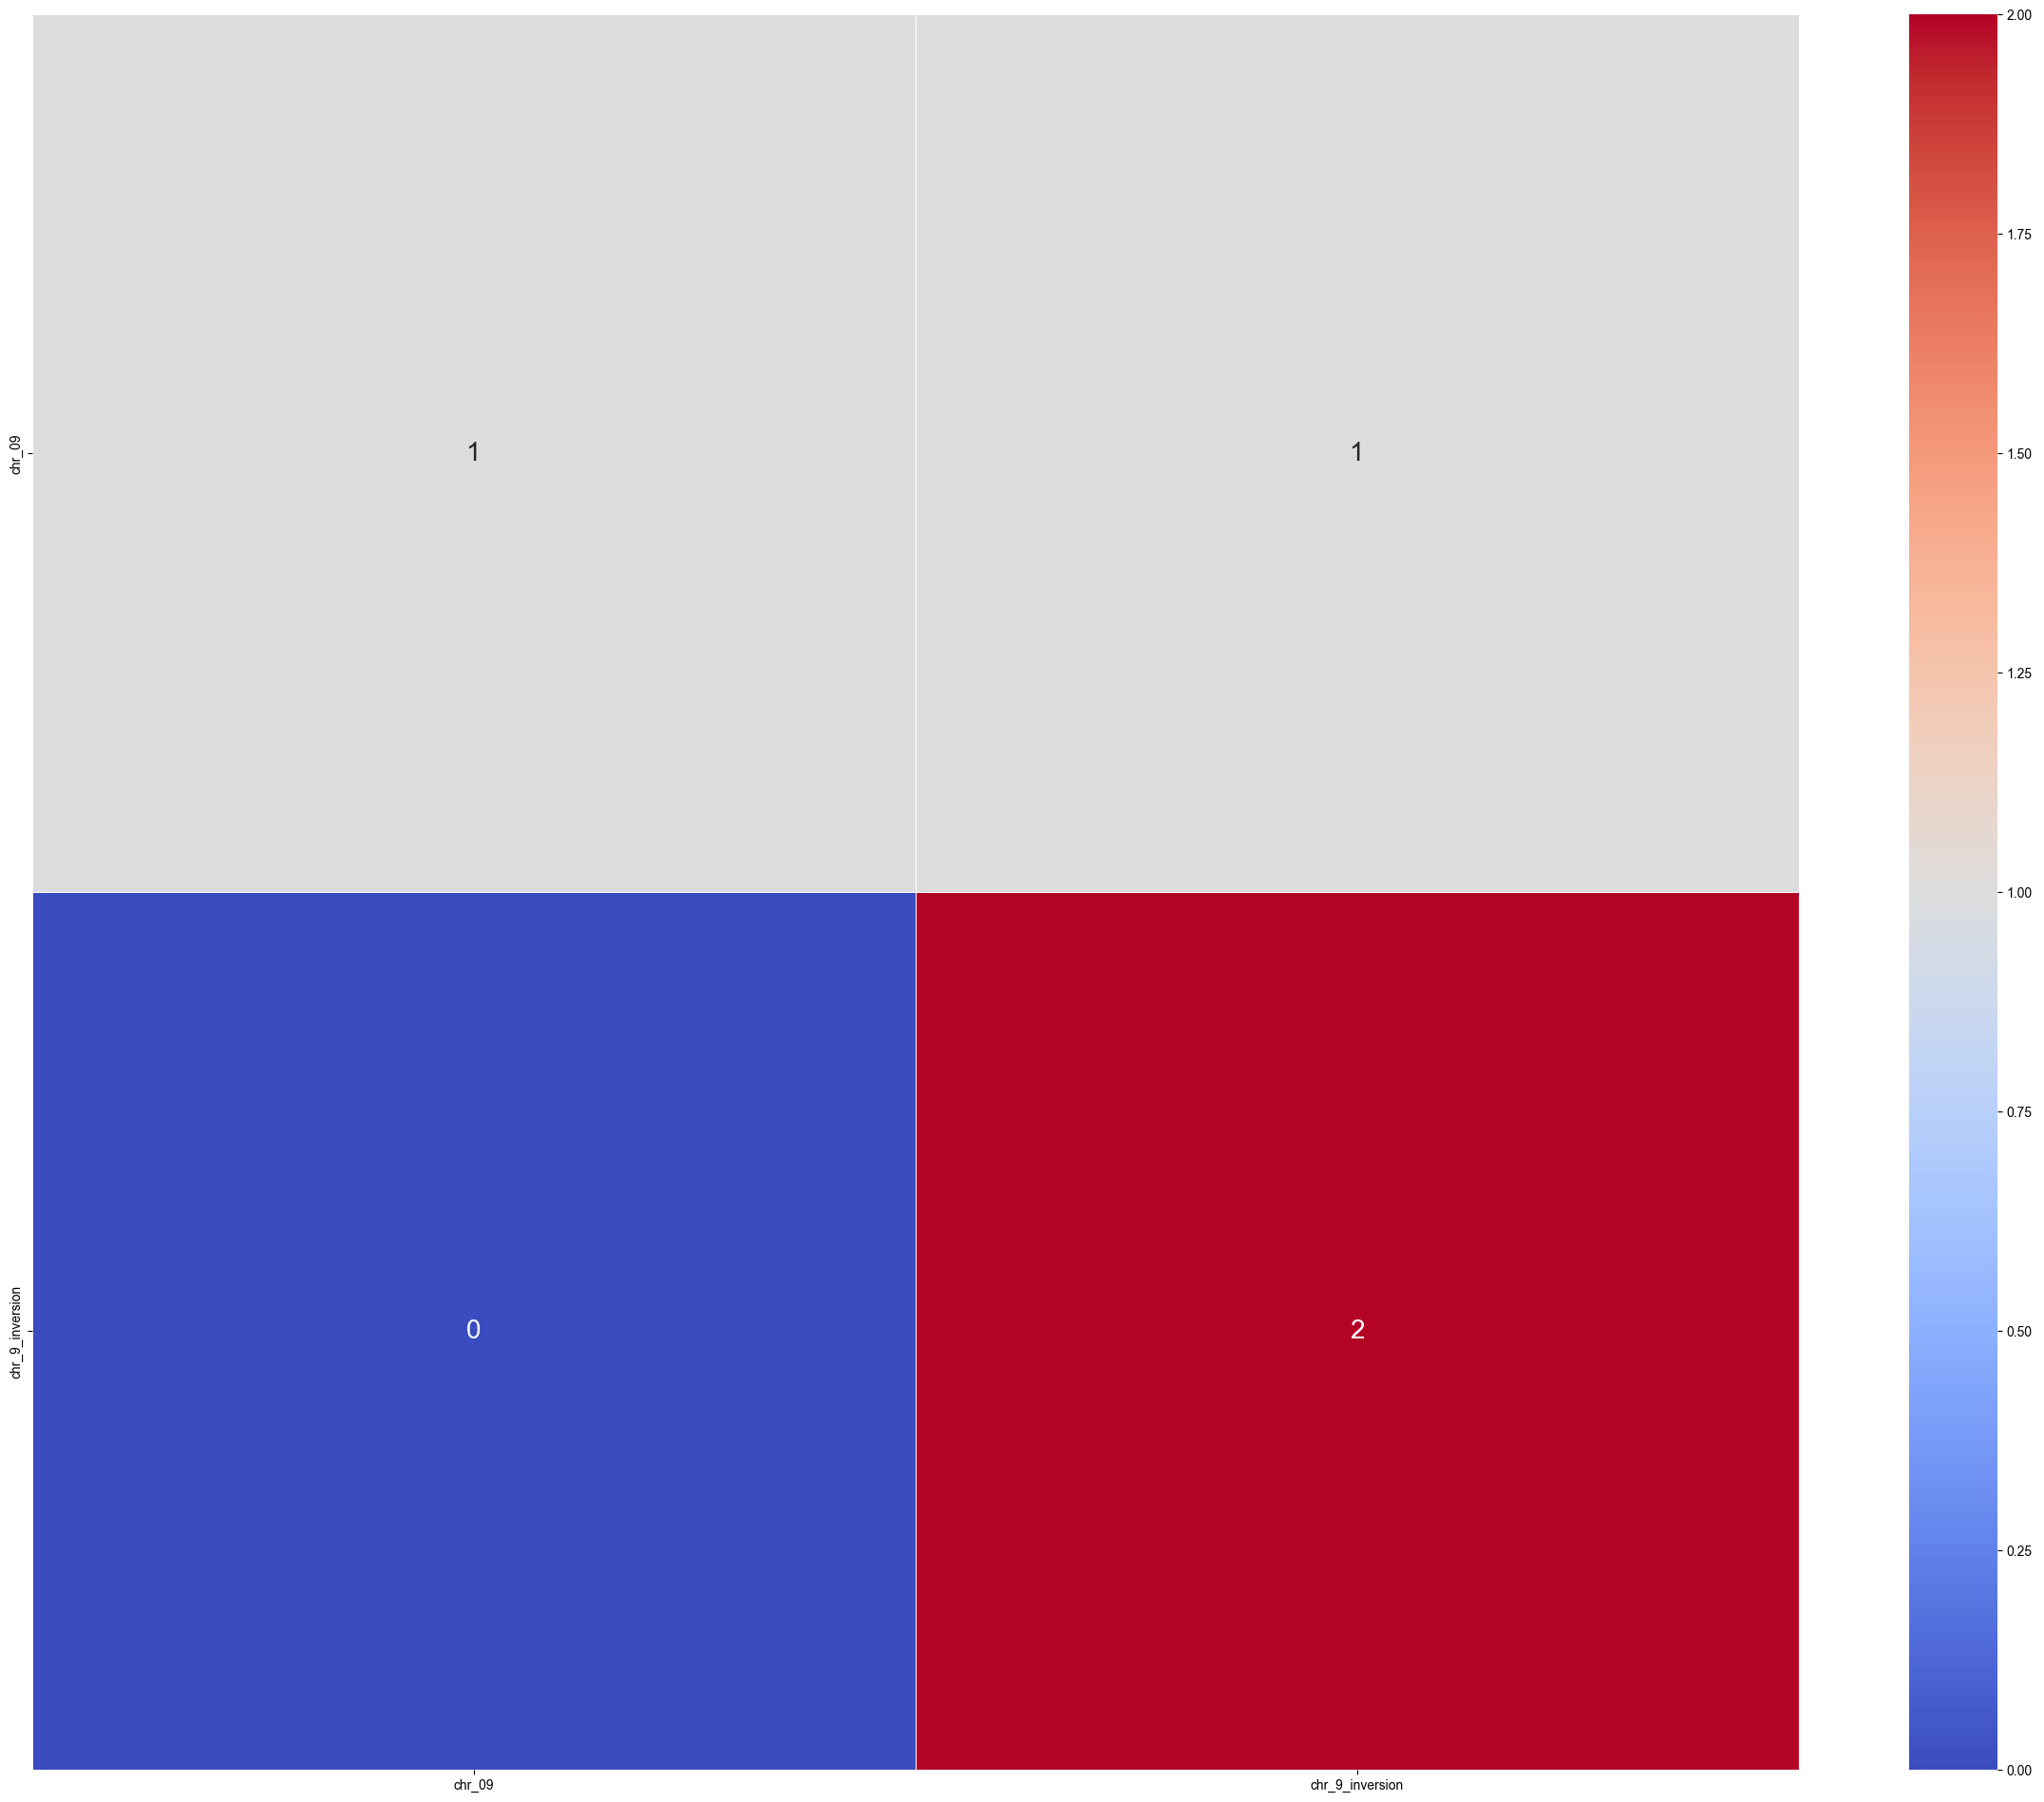

In [181]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [182]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [184]:
y_predict

array([[0.84960556, 0.05832672],
       [0.25954133, 0.45228878],
       [0.02276843, 0.86967975],
       [0.03190836, 0.86640733]], dtype=float32)

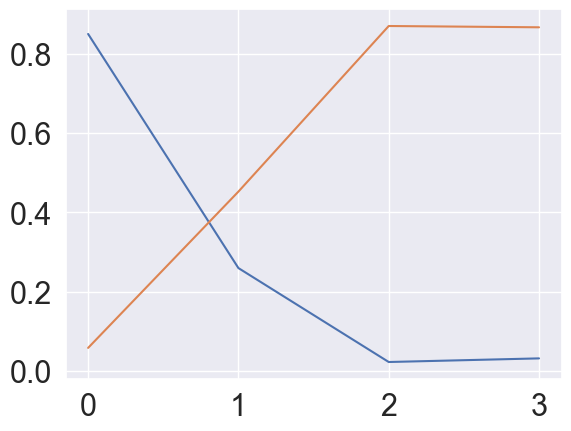

In [185]:
plt.plot(y_predict)

In [186]:
y_predict_1D = y_predict[:,0]

In [187]:
y_predict_1D_processed = 1- y_predict_1D

In [188]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [189]:
auc_rf

1.0

In [190]:
x = y = np.arange(0,1.1,0.1)

In [191]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

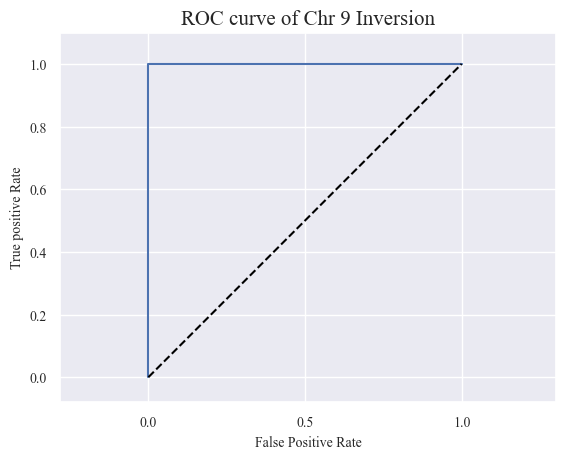

In [192]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [194]:
auc_value = auc(fpr, tpr)

In [195]:
print('AUC is ', auc_value)

AUC is  1.0


# Results

In [197]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.750


In [198]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       1.00      0.50      0.67         2
chr_9_inversion       0.67      1.00      0.80         2

       accuracy                           0.75         4
      macro avg       0.83      0.75      0.73         4
   weighted avg       0.83      0.75      0.73         4



In [199]:
type(performanceReport)

str

In [200]:
confusion

,chr_09,chr_9_inversion
chr_09,1,1
chr_9_inversion,0,2


In [201]:
print('AUC is ', auc_value)

AUC is  1.0


## Export to a text file

In [203]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()